In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Synthetic Circle

### Description of the Problem

This is a dataset given which has 100 circles made up of 10000 points. The data has 3 columns 'x', 'y' and 'z'. This dataset is primarly created to gauge how well do clustering algorithms perform on this task. We will begin with Exploratory Data Analysis and then proceed with Preprocessing and Analysis of results. 

### What Conflicting means here? 

Conflicting in this data set refers to the difference in clusters formed by the our algorithms and the class that has been provided by the data set itself we can compare both to getan estimate of what clustering methods are good and what are bad while also getting ideas about how to think. 


In [48]:
df = pd.read_csv('circles.csv') 

In [49]:
df.head()

x          y  class
0    3.15676  116.12252      6
1   16.14436   16.81660     11
2  100.31212   64.99025     53
3   -1.33773   84.81772      4
4  104.37328   62.42373     53

### Exploratory Visualization

Since this is a simple enough dataset we just want visualize how the data looks like os we can choose the Algorithm required. For example in this case we see that the circles are unifromly distributed around your points space ranging from 200x200 and each row has 10 circles and 10 rows with each circle having 100 points. 

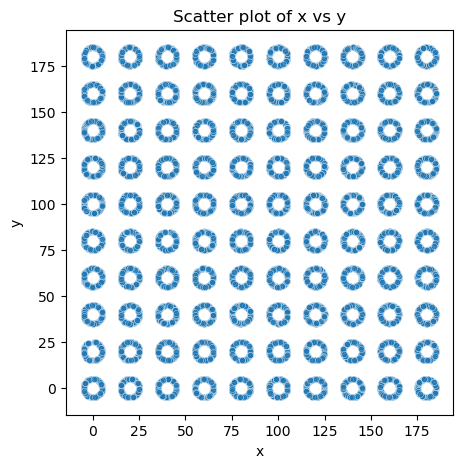

In [50]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x='x', y='y', s=20, color='tab:blue', alpha=0.7)
plt.title('Scatter plot of x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Plotted graph to verify that the "dataset comprises ... points arranged into 100 circles"

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10000 non-null  float64
 1   y       10000 non-null  float64
 2   class   10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


$1000$ non-null data rows. $x,y \in$ float and class $\in$ int

In [52]:
df.describe()

x             y         class
count  10000.000000  10000.000000  10000.000000
mean      89.981670     90.003827     49.500000
std       57.457467     57.559719     28.867513
min       -5.000000     -4.999860      0.000000
25%       40.237885     40.133840     24.750000
50%       89.999995     90.000080     49.500000
75%      139.898800    139.977695     74.250000
max      184.999920    185.000000     99.000000

In [53]:
print(df.isnull().sum())
df[df.duplicated(keep=False)]

x        0
y        0
class    0
dtype: int64


Empty DataFrame
Columns: [x, y, class]
Index: []

No null entries and no duplicate rows with duplicates

In [54]:
#data normalization (Z-score Normalization) 
for col in ['x','y']:
    mean = df[col].mean()
    std = df[col].std()
    df[col] = (df[col] - mean) / std

Performed z-score normalization. Rationale for choosing z-score instead of min-max or other normalization techniques is prior experience with several clustering examples is Z-score preserves the data much better than other normalization techinques doesnt alter the underlying distribution too much. 

In [55]:
df.head()

x         y  class
0 -1.511116  0.453767      6
1 -1.285078 -1.271501     11
2  0.179793 -0.434567     53
3 -1.589339 -0.090100      4
4  0.250474 -0.479156     53

### Dimensionality Reduction

In this section we will proceed to reduce the dimension of this to 1 as specified by the document as it wanted us to reduce dimensions so we capture x,y is captured in PC1 in z.


In [56]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X = df[['x','y']].values
y = df['class'].values
df['z_l'] = LDA(n_components=1).fit_transform(X, y).ravel()
df['z']   = PCA(n_components=1).fit_transform(X).ravel()
df.head()



x         y  class        z_l         z
0 -1.511116  0.453767      6 -11.751161 -0.747659
1 -1.285078 -1.271501     11  16.791339 -1.807774
2  0.179793 -0.434567     53   7.548590 -0.180153
3 -1.589339 -0.090100      4  -3.190557 -1.187543
4  0.250474 -0.479156     53   8.475825 -0.161703

### Kmeans Clustering Algorithm 

Let us now impliment the Kmeans Clustering method. Prelimnarily we need a function which can compute the euclidean distances very quickly. We will be using python's Numpy library to speed up a lot of operations. So we begin this by randomly sampling k centroids from a uniform distribution and then we iterate and recompute which points belong to which other cluster compared to initial clusters and keep iterating till we reach convergence or reach max iteration. Max iteration is built to prevent infinite loops. 

We impliment this in the class Kmeans, which contains all the necessery functions for the Kmeans clustering implimentation. It is also speed up by using numpy array vectorizations as matrix multiplications are quicker than forloops because they use cython. We also have one of the metrics to see quality of our clusters Silhoutte score. 

In [ ]:
#Kmeans Clustering algorithm 
def euclidean_distance(point, data):
    return np.sqrt(np.sum((point - data)  2))

class KMeans: 
    #initialize k and max iterations (to prevent infinite loops)
    def __init__(self, k, max_iter=100):
        self.k = k
        self.max_iter = max_iter
    
    #Main Clustering function
    def fit(self, data):


        #initalize k random centroids from a unifrom distribution
        min_c, max_c = np.min(data, axis=0), np.max(data, axis=0)
        self.centroids = [np.random.uniform(min_c, max_c) for _ in range(self.k)]
        self.centroids = np.array(self.centroids) 
         
        #iter to refine centroids
        curr_iter = 0
        prev_centroids = None
        
        pbar = tqdm(total=self.max_iter, desc="Clustering Progress")
        while (prev_centroids is None or np.not_equal(prev_centroids, self.centroids).any()) and curr_iter < self.max_iter:

            #calccculate all squared distances from N points to K centroids
            diff = data[:, np.newaxis] - self.centroids
            sqr_dists = np.sum(diff2, axis=2)
            
            #assign each point to the closest centroid
            labels = np.argmin(sqr_dists, axis=1)
            prev_centroids = np.copy(self.centroids)
            
            for i in range(self.k):
                clustered_pts = data[labels == i]
                if len(clustered_pts) > 0:
                    self.centroids[i] = np.mean(clustered_pts, axis=0)
                else:
                    self.centroids[i] = prev_centroids[i]

            curr_iter += 1
            pbar.update(1)
        pbar.close()

class Eval: 
    @staticmethod
    def silhouette_score(X, labels):
        X, labels = np.array(X), np.array(labels)
        n = len(X)
        
        #precompute pairwise distance matrix for vectorization
        D = np.sqrt(((X[:, None, :] - X[None, :, :])  2).sum(axis=2))
        
        unique_labels = np.unique(labels)
        s = np.zeros(n)
        
        for i in tqdm(range(n), desc="Silhouette"):
            same = labels == labels[i]
            
            #a: mean intra-cluster distance
            if np.sum(same) > 1:
                a = np.sum(D[i, same]) / (np.sum(same) - 1)
            else:
                a = 0

            #b: smallest mean inter-cluster distance
            b = np.inf
            for l in unique_labels:
                if l == labels[i]: continue
                mask = labels == l
                if np.any(mask):
                    b = min(b, np.mean(D[i, mask]))
            
            s[i] = (b - a) / max(a, b) if max(a, b) > 0 else 0

        return np.mean(s)


## DBSCAN Algorithm 

Let us know Impliment our secodn algorithm of choice which is the DBscan Algorithm We will first write some helper functions to make our job easier for writing the main DBscan Algorithm. 

In [ ]:
#DBscan Algorithm

def compute_distances(X):
    return np.sqrt(((X[:, None, :] - X[None, :, :])  2).sum(axis=2))

def neighbours(D, point_idx, eps):
    return np.where(D[point_idx] <= eps)[0]

def findpts(D, eps, min_pts):
    core_pts = np.where((D <= eps).sum(axis=1) >= min_pts)[0]
    return core_pts

def expand_cluster(D, labels, point_idx, neighbours_list, cluster_id, eps, min_pts):
    labels[point_idx] = cluster_id
    i = 0
    while i < len(neighbours_list):
        neigh = neighbours_list[i]
        if labels[neigh] == -1:
            labels[neigh] = cluster_id
        elif labels[neigh] == 0:
            labels[neigh] = cluster_id
            new_neighbours = neighbours(D, neigh, eps)
            if len(new_neighbours) >= min_pts:
                neighbours_list = np.concatenate((neighbours_list, new_neighbours))
        i += 1
    return labels

def dbscan(X, eps, min_pts):
    X = np.asarray(X, dtype=np.float32)
    n = len(X)
    labels = np.zeros(n, dtype=int)
    cluster_id = 0
    
    D = compute_distances(X)
    core_pts = findpts(D, eps, min_pts)
    
    for point_idx in tqdm(range(n), desc="Dbscan progress"):
        if labels[point_idx] != 0:
            continue
        if point_idx in core_pts:
            cluster_id += 1
            new_neighbours = neighbours(D, point_idx, eps)
            labels = expand_cluster(D, labels, point_idx, new_neighbours, cluster_id, eps, min_pts)
        else:
            labels[point_idx] = -1  
    return labels


## Hyper Parameters.

We have the following Hyperparametes to optimize: 

1. K = number of clusters and it indicates how many centroids we want to initalize. 
2. Max iterations: incase Kmeans doesnt converge this makes sure we get good values a hard coded upper bound on iteraitons
3. eps: which is the max dist between two points which can be considered neighbouts, although there is a method to do this by using KNN to optiize eps I have just played around with multiple values and see how silhoutte score is affected
4. Min points: this defines the minimum number of points which defines a density and this too I have optimized by playing with the parameter. 

- Note: for DBscan we can see that we have to optimize both eps and min points to get teh best value to do this the optimal way is to plot for some tries how eps changes with silhoutte score and min pts. 



 

## Experimentation We Begin with our experimentations

we First begin with doing Kmeans and DBscan on the Dataset with and without PCA to 1 and work on KMEANS and DBscan and visualize the clustering results in the graphs below. 


In [59]:
from sklearn.metrics import silhouette_score

#defining our dataset
X1 = df[['x', 'y']].values
X2 = df[['z']].values
X3 = df[['z_l']].values

#Kmeans Experimentation

#Normal xy
kmeans_1 = KMeans(k=50, max_iter=200) 
kmeans_1.fit(X1)
labels_kmeans_1 = np.argmin([np.linalg.norm(X1 - centroid, axis=1) for centroid in kmeans_1.centroids], axis=0)
#s1 = Eval.silhouette_score(X1, labels_kmeans_1)
s1 = silhouette_score(X1, labels_kmeans_1)

#PCA 1
kmeans_2 = KMeans(k=100, max_iter=500)
kmeans_2.fit(X2)
labels_kmeans_2 = np.argmin([np.linalg.norm(X2 - centroid, axis=1) for centroid in kmeans_2.centroids], axis=0)
#s2 = Eval.silhouette_score(X2, labels_kmeans_2)
s2 = silhouette_score(X2, labels_kmeans_2)

#LDA 1
kmeans_3 = KMeans(k=100, max_iter=500)
kmeans_3.fit(X3)
labels_kmeans_3 = np.argmin([np.linalg.norm(X3 - centroid, axis=1) for centroid in kmeans_3.centroids], axis=0)
s3 = silhouette_score(X3, labels_kmeans_3)
#s3 = Eval.silhouette_score(X3, labels_kmeans_3)
    
print(f"KMeans Silhouette Score for X1 (x,y): {s1}")
print(f"KMeans Silhouette Score for X2 (z): {s2}")
print(f"KMeans Silhouette Score for X3 (z_l): {s3}")

#DBSCAN Experimentation
labels_xy = dbscan(X1, eps=0.05, min_pts=4)
labels_z = dbscan(X2, eps=0.05, min_pts=5)
labels_zl = dbscan(X3, eps=0.05, min_pts=5)

#s_dbscan_xy = Eval.silhouette_score(X1, labels_xy)
#s_dbscan_z = Eval.silhouette_score(X2, labels_z)
s_dbscan_xy = silhouette_score(X1, labels_xy)
s_dbscan_z = silhouette_score(X2, labels_z)
s_dbscan_zl = silhouette_score(X3, labels_zl)

print(f"DBSCAN Silhouette Score for X1 (x,y): {s_dbscan_xy}")
print(f"DBSCAN Silhouette Score for X2 (z): {s_dbscan_z}")
print(f"DBSCAN Silhouette Score for X3 (z_l): {s_dbscan_zl}")


Clustering Progress:   0%|          | 0/200 [00:00<?, ?it/s]

Clustering Progress:   7%|▋         | 37/500 [00:00<00:02, 168.59it/s]


KMeans Silhouette Score for X1 (x,y): 0.3779757418634273
KMeans Silhouette Score for X2 (z): 0.6274285272154402
KMeans Silhouette Score for X3 (z_l): 0.54275967932841


Dbscan progress: 100%|██████████| 10000/10000 [00:00<00:00, 69051.70it/s]


DBSCAN Silhouette Score for X1 (x,y): 0.608503267061336
DBSCAN Silhouette Score for X2 (z): 0.6148081404697655
DBSCAN Silhouette Score for X3 (z_l): 0.1452684861710876


### Visualizations And Analysis

Below we shall first visualize and then work on our analysis

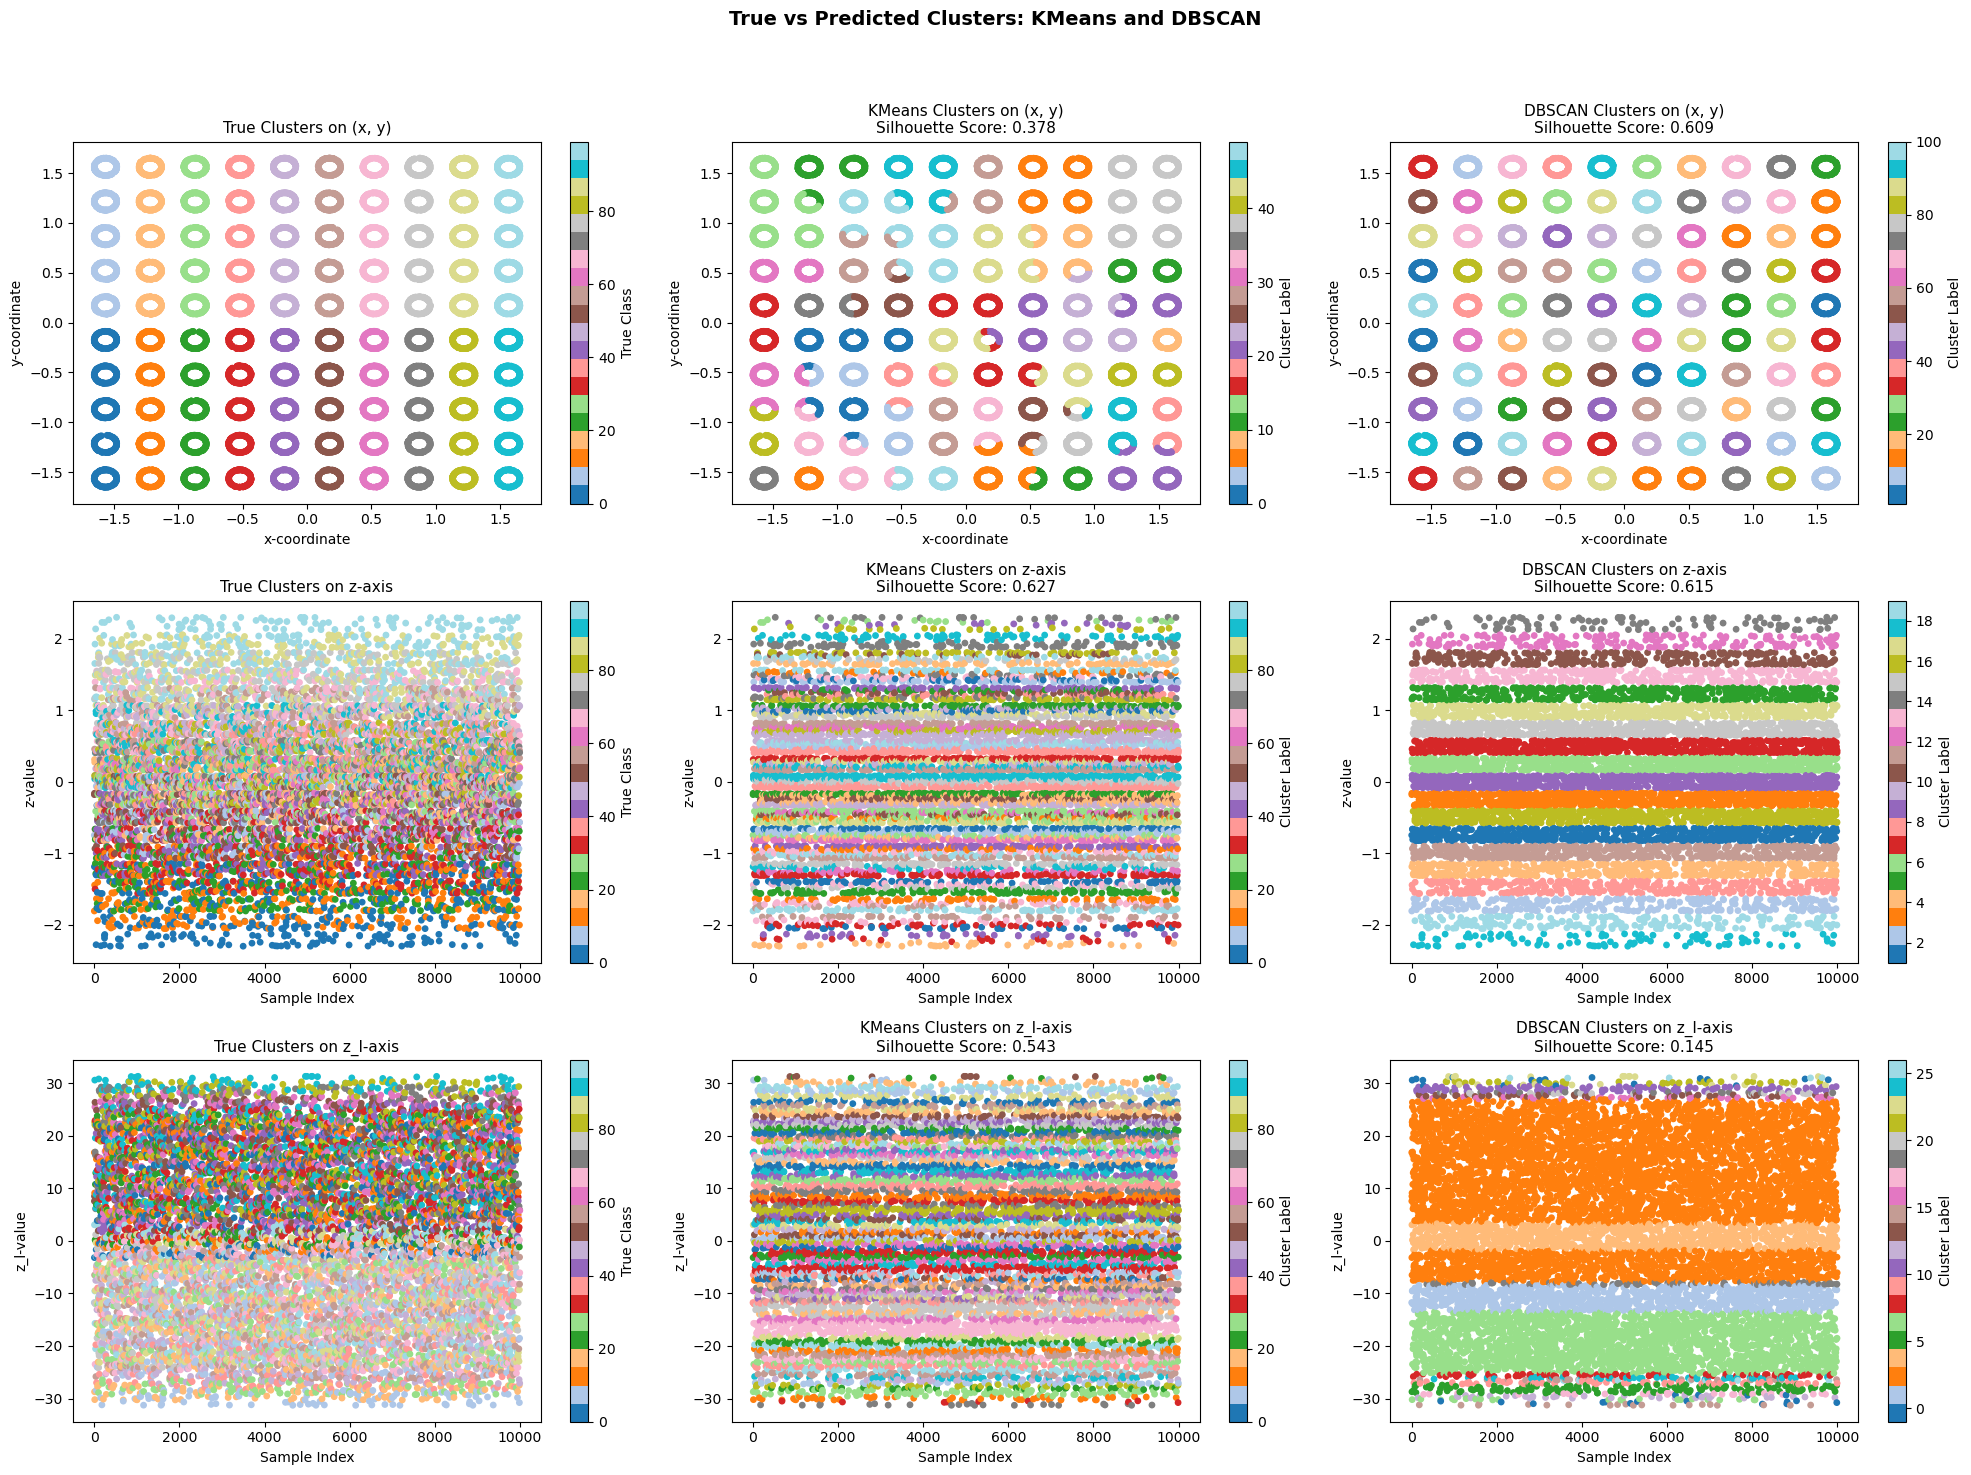

In [62]:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

#True clusters on (x, y)
sc1 = axs[0, 0].scatter(X1[:, 0], X1[:, 1], c=df['class'], cmap='tab20', s=15)
axs[0, 0].set_title("True Clusters on (x, y)", fontsize=11)
axs[0, 0].set_xlabel("x-coordinate", fontsize=10)
axs[0, 0].set_ylabel("y-coordinate", fontsize=10)
plt.colorbar(sc1, ax=axs[0, 0], label="True Class")

#KMeans on (x, y)
sc2 = axs[0, 1].scatter(X1[:, 0], X1[:, 1], c=labels_kmeans_1, cmap='tab20', s=15)
axs[0, 1].set_title(f"KMeans Clusters on (x, y)\nSilhouette Score: {s1:.3f}", fontsize=11)
axs[0, 1].set_xlabel("x-coordinate", fontsize=10)
axs[0, 1].set_ylabel("y-coordinate", fontsize=10)
plt.colorbar(sc2, ax=axs[0, 1], label="Cluster Label")

#DBSCAN on (x, y)
sc3 = axs[0, 2].scatter(X1[:, 0], X1[:, 1], c=labels_xy, cmap='tab20', s=15)
axs[0, 2].set_title(f"DBSCAN Clusters on (x, y)\nSilhouette Score: {s_dbscan_xy:.3f}", fontsize=11)
axs[0, 2].set_xlabel("x-coordinate", fontsize=10)
axs[0, 2].set_ylabel("y-coordinate", fontsize=10)
plt.colorbar(sc3, ax=axs[0, 2], label="Cluster Label")

#ttrue clusters on z
sc4 = axs[1, 0].scatter(np.arange(len(X2)), X2[:, 0], c=df['class'], cmap='tab20', s=15)
axs[1, 0].set_title("True Clusters on z-axis", fontsize=11)
axs[1, 0].set_xlabel("Sample Index", fontsize=10)
axs[1, 0].set_ylabel("z-value", fontsize=10)
plt.colorbar(sc4, ax=axs[1, 0], label="True Class")

#KMeans on z
sc5 = axs[1, 1].scatter(np.arange(len(X2)), X2[:, 0], c=labels_kmeans_2, cmap='tab20', s=15)
axs[1, 1].set_title(f"KMeans Clusters on z-axis\nSilhouette Score: {s2:.3f}", fontsize=11)
axs[1, 1].set_xlabel("Sample Index", fontsize=10)
axs[1, 1].set_ylabel("z-value", fontsize=10)
plt.colorbar(sc5, ax=axs[1, 1], label="Cluster Label")

#DBSCAN on z
sc6 = axs[1, 2].scatter(np.arange(len(X2)), X2[:, 0], c=labels_z, cmap='tab20', s=15)
axs[1, 2].set_title(f"DBSCAN Clusters on z-axis\nSilhouette Score: {s_dbscan_z:.3f}", fontsize=11)
axs[1, 2].set_xlabel("Sample Index", fontsize=10)
axs[1, 2].set_ylabel("z-value", fontsize=10)
plt.colorbar(sc6, ax=axs[1, 2], label="Cluster Label")

#true clusters on z_l
sc7 = axs[2, 0].scatter(np.arange(len(X3)), X3[:, 0], c=df['class'], cmap='tab20', s=15)
axs[2, 0].set_title("True Clusters on z_l-axis", fontsize=11)
axs[2, 0].set_xlabel("Sample Index", fontsize=10)
axs[2, 0].set_ylabel("z_l-value", fontsize=10)
plt.colorbar(sc7, ax=axs[2, 0], label="True Class")

#KMeans on z_l
sc8 = axs[2, 1].scatter(np.arange(len(X3)), X3[:, 0], c=labels_kmeans_3, cmap='tab20', s=15)
axs[2, 1].set_title(f"KMeans Clusters on z_l-axis\nSilhouette Score: {s3:.3f}", fontsize=11)
axs[2, 1].set_xlabel("Sample Index", fontsize=10)
axs[2, 1].set_ylabel("z_l-value", fontsize=10)
plt.colorbar(sc8, ax=axs[2, 1], label="Cluster Label")

#DBSCAN on z_l
sc9 = axs[2, 2].scatter(np.arange(len(X3)), X3[:, 0], c=labels_zl, cmap='tab20', s=15)
axs[2, 2].set_title(f"DBSCAN Clusters on z_l-axis\nSilhouette Score: {s_dbscan_zl:.3f}", fontsize=11)
axs[2, 2].set_xlabel("Sample Index", fontsize=10)
axs[2, 2].set_ylabel("z_l-value", fontsize=10)
plt.colorbar(sc9, ax=axs[2, 2], label="Cluster Label")

plt.suptitle("True vs Predicted Clusters: KMeans and DBSCAN", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Analysis of Results 

1. Metric Based analysis: 
- We will first compare silhoutte scores: Silhoutte score basically represent how well seperated and good to do your clusters are and here we can see we are somehwere in the middle which indicates not perfect clusterring but good enough we can see from the graphs above that DBscan is one which best replicates how the original clustering looks like. 
- We also compare three different datasets as we compare what true x,y based clustering, z which is PCA based clustering and z_l which is lDA based clustering methodology. 

2. Visualizaiton: 
- We can see how as we reduce the dimensions we can see how the dimension and clustering changes. 
-We have used two mehtods of dimensionality reduction PCA and LDA both which reduce the current dataset from two dimensions to one dimension. 

3. Clustering methods Analysis
- We used two methods first is Kmeans based clustering which we can see has not been optimal for clustering primarly because of its random initalization of points which is doesnt cause the centroids to be at the center and hence we can see in the plot how its recognized other circles as their own. 
- We can see the next one which is DBScan which performs amazing as it only recognizes only the circles very well, this is because DBScan is a density based clustering system hence it doesnt care about intializations etc. 


### Cluster Comparison Before and After Dimensionality Reduction

#### 1. Before Reduction (x, y)

- Clusters appear loosely compact and somewhat overlapping.  
- KMeans struggles to form clear boundaries, reflected in its lower silhouette score (≈ 0.38).  
- DBSCAN, on the other hand, performs better because it adapts to density and shape rather than relying on distance alone.


#### 2. After PCA (z)

-PCA reduces the 2D data to 1D while preserving maximum variance.  
- The KMeans silhouette score jumps from 0.38 → 0.63, showing that clusters have become more compact and better separated.  
- DBSCAN’s score (~0.61) stays nearly the same, meaning the density-based structure was well preserved even in the reduced space.  
- Finally: PCA captures the main separation axis in the data, making clusters appear more linearly separable.


#### 3. After LDA (zₗ)

- LDA aims to maximize class separation, but it works best when class labels or clear linear boundaries exist.  
- KMeans performs moderately well (score ≈ 0.54), suggesting that LDA maintains some of the cluster structure.  
- However, DBSCAN’s performance collapses (score ≈ 0.15) — indicating that density information was distorted.  
- Finally: The LDA projection likely compressed clusters too closely along one discriminant axis, causing DBSCAN to merge dense regions and lose cluster distinction.


# Bank Marketing

## About the Dataset

The dataset is captured by a Portuguese banking institution for the purpose of improving their direct marketing campaign. The classification goal is to predict if the client will subscribe to a term deposit.

The about section of the dataset provides other key insights that guides our data exploration and pre-processing. The datasets we have considered (as per the question) is the one with 17 features split into a complete csv dataset with all the data points (total 45211) and another csv dataset with a 10% randomly selected sample.

The data-types are either Categorical or Integer. The categorical data-types will need to be encoded with one-hot encoding. The about section also mentions that some features have missing values which means they will either need to be dropped or we need to impute the value.

In [ ]:
# Load the bank marketing dataset properly
import re

def parse_bank_csv_line(line):
    # Remove outer quotes and split by semicolon, then clean inner quotes
    line = line.strip().strip('"')  
    parts = line.split(';')
    cleaned_parts = []
    for part in parts:
        # Remove double quotes around values
        part = part.strip('""')
        cleaned_parts.append(part)
    return cleaned_parts

# Read and parse the file
data = []
with open('bank_marketing/bank-full.csv', 'r', encoding='utf-8') as f:
    for line in f:
        parsed_line = parse_bank_csv_line(line.strip())
        data.append(parsed_line)

# Create DataFrame
columns = data[0]  # First row is header
df_bank = pd.DataFrame(data[1:], columns=columns)

In [ ]:
df_bank.head()

age           job  marital  education default balance housing loan  contact  \
0  58    management  married   tertiary      no    2143     yes   no  unknown   
1  44    technician   single  secondary      no      29     yes   no  unknown   
2  33  entrepreneur  married  secondary      no       2     yes  yes  unknown   
3  47   blue-collar  married    unknown      no    1506     yes   no  unknown   
4  33       unknown   single    unknown      no       1      no   no  unknown   

  day month duration campaign pdays previous poutcome   y  
0   5   may      261        1    -1        0  unknown  no  
1   5   may      151        1    -1        0  unknown  no  
2   5   may       76        1    -1        0  unknown  no  
3   5   may       92        1    -1        0  unknown  no  
4   5   may      198        1    -1        0  unknown  no

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# how many occurances of "unknown" in entire df_bank
total_unknowns = sum((df_bank[col] == "unknown").sum() for col in df_bank.columns)
total_unknowns

52124

In [ ]:
# converting integer columns to int
integer_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Convert columns to integers
for col in integer_columns:
    if col in df_bank.columns:
        df_bank[col] = pd.to_numeric(df_bank[col], errors='coerce').astype('Int64')  # Use Int64 to handle NaN values

df.dtypes

x        float64
y        float64
class      int64
z        float64
dtype: object

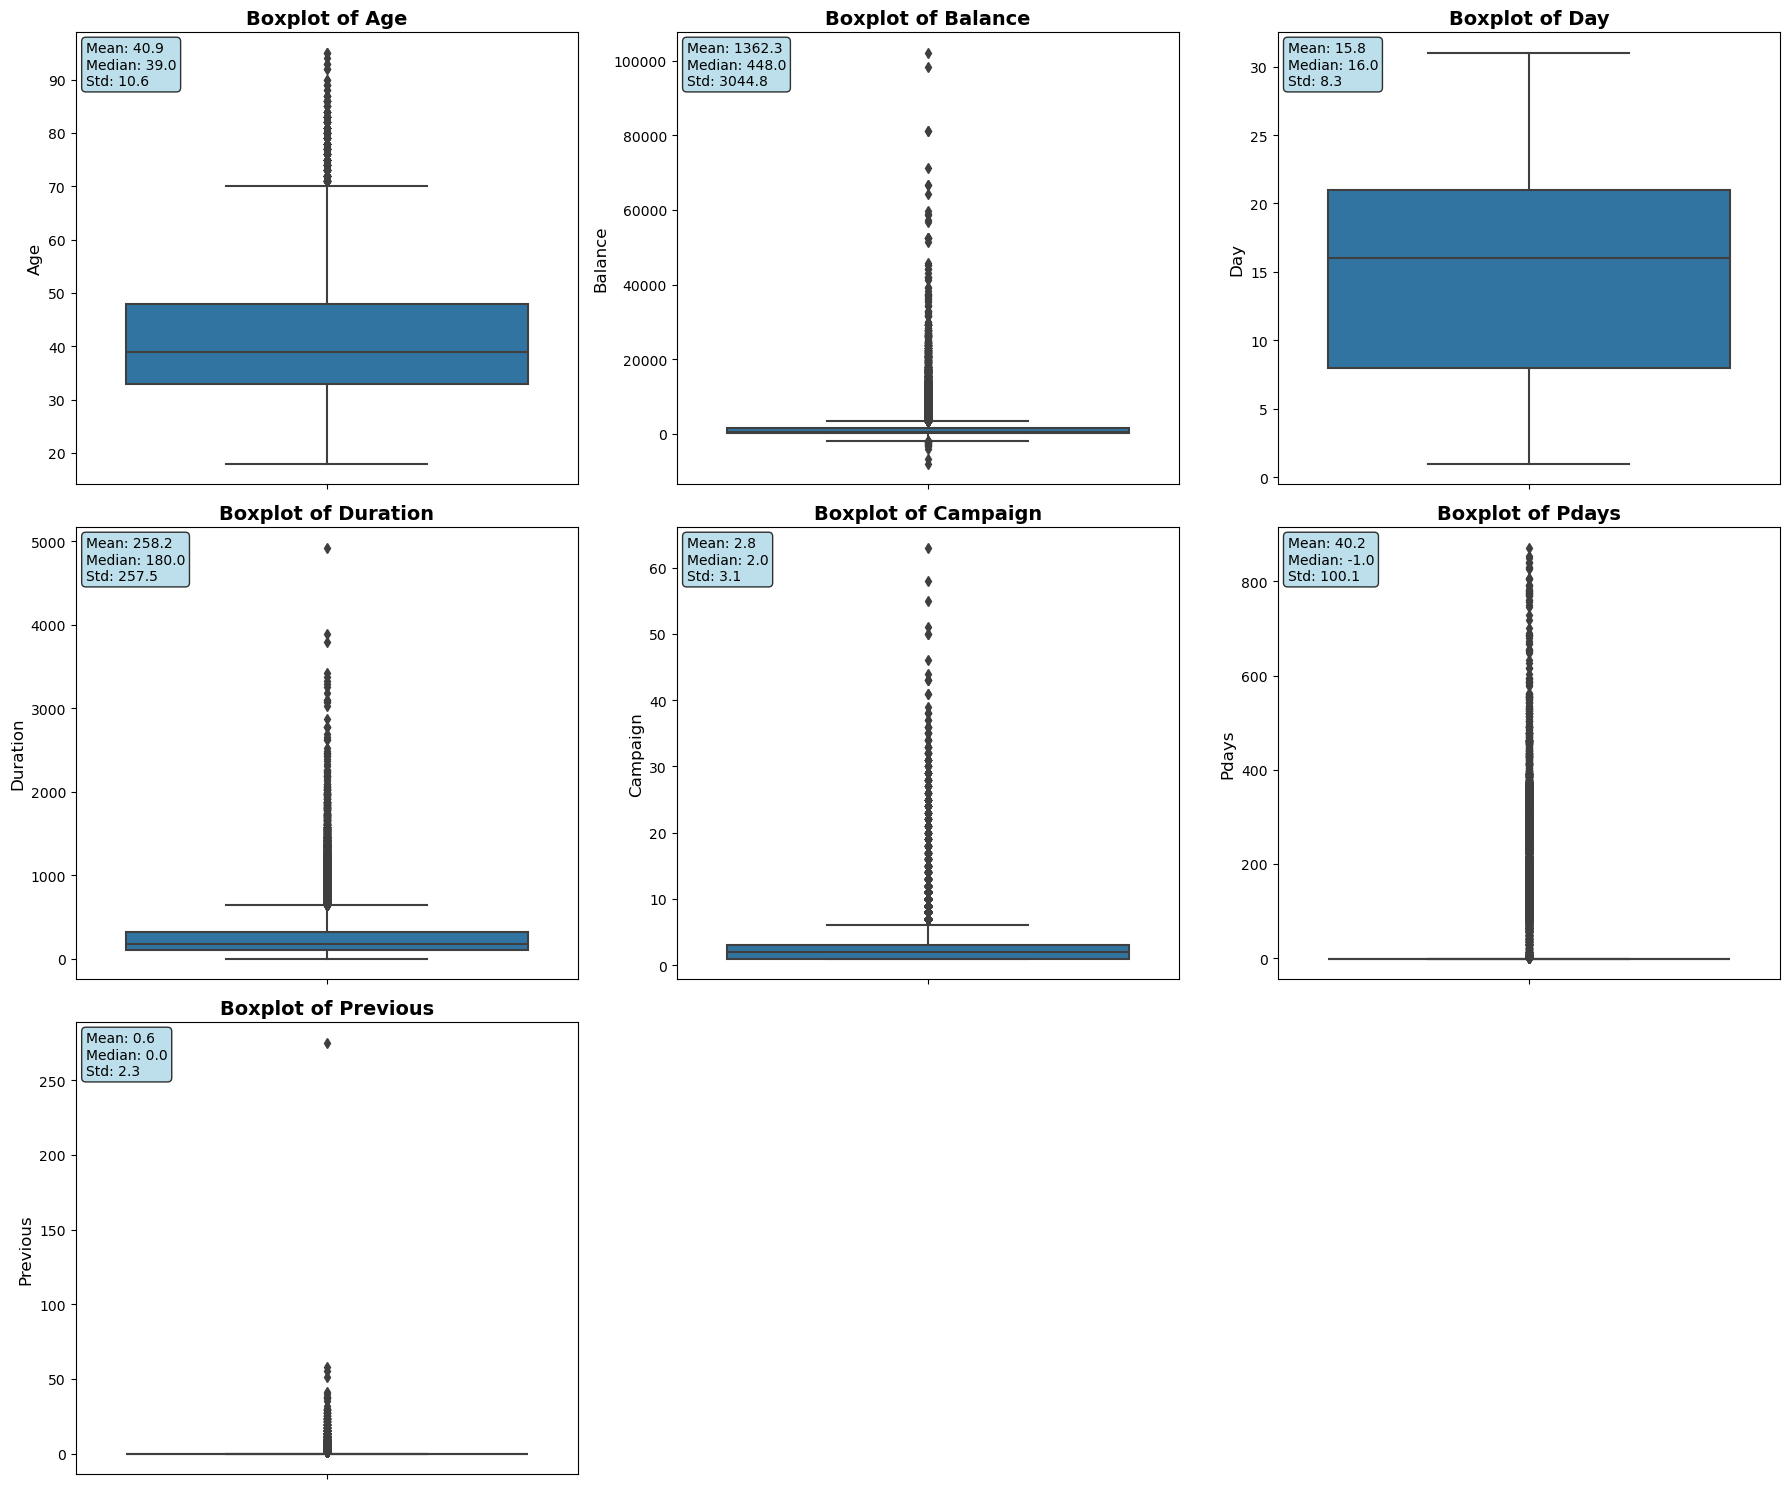

In [ ]:
# Create a subplot grid
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(integer_columns):
    if i < len(axes):
        sns.boxplot(data=df_bank, y=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col.title()}', fontsize=14, fontweight='bold')
        axes[i].set_ylabel(col.title(), fontsize=12)
        
        # Add statistics text
        mean_val = df_bank[col].mean()
        median_val = df_bank[col].median()
        std_val = df_bank[col].std()
        
        stats_text = f'Mean: {mean_val:.1f}\nMedian: {median_val:.1f}\nStd: {std_val:.1f}'
        axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes, 
                    verticalalignment='top', fontsize=10,
                    bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Hide unused subplots
for j in range(len(integer_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

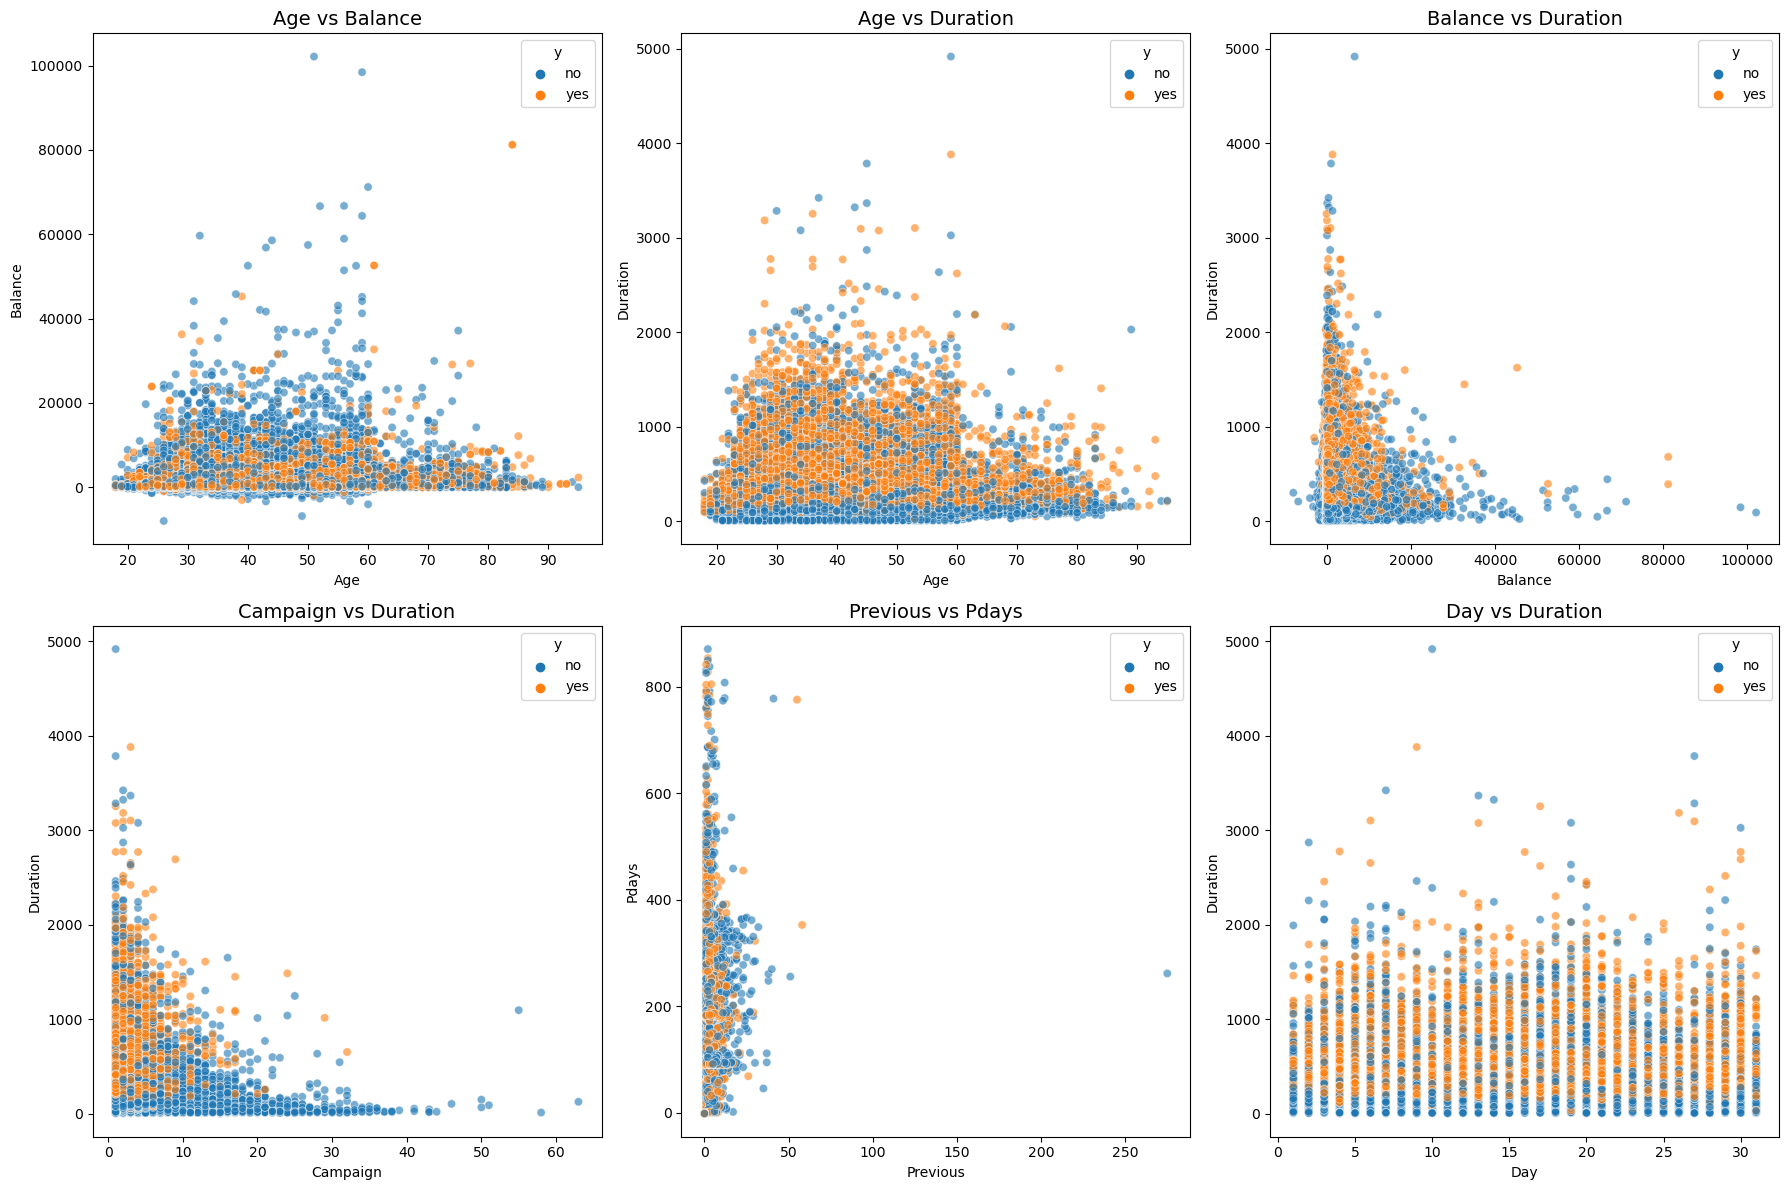

Scatter plots showing relationships between numeric variables.
Points are colored by subscription outcome (y): 'yes' vs 'no'


In [ ]:
# Create scatter plots to explore relationships between numeric variables
integer_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create scatter plots for interesting relationships
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Define interesting relationships to plot
relationships = [
    ('age', 'balance'),
    ('age', 'duration'),
    ('balance', 'duration'),
    ('campaign', 'duration'),
    ('previous', 'pdays'),
    ('day', 'duration')
]

for i, (x_col, y_col) in enumerate(relationships):
    if i < len(axes):
        # Color by target variable 'y' if you want to see subscription patterns
        sns.scatterplot(data=df_bank, x=x_col, y=y_col, hue='y', ax=axes[i], alpha=0.6)
        axes[i].set_title(f'{x_col.title()} vs {y_col.title()}', fontsize=14)
        axes[i].set_xlabel(x_col.title())
        axes[i].set_ylabel(y_col.title())

plt.tight_layout()
plt.show()

print("Scatter plots showing relationships between numeric variables.")
print("Points are colored by subscription outcome (y): 'yes' vs 'no'")

In [ ]:
# Z-score based outlier removal (BEFORE normalization)
print(f"Original dataset shape: {df_bank.shape}")

# Store original data before outlier removal
original_rows = len(df_bank)

# Remove outliers using Z-score threshold (typically 3 or 2.5)
outlier_threshold = 3
total_outliers_removed = 0

# Create a mask to track which rows to keep
keep_mask = pd.Series([True] * len(df_bank), index=df_bank.index)

for col in integer_columns:
    if col in df_bank.columns:
        # Calculate z-scores for original data (not normalized)
        mean_val = df_bank[col].mean()
        std_val = df_bank[col].std()
        
        # Handle case where std is 0 (all values same)
        if std_val == 0:
            print(f"{col}: No outliers (std=0)")
            continue
            
        z_scores = np.abs((df_bank[col] - mean_val) / std_val)
        
        # Count outliers before removal
        col_outliers_mask = z_scores > outlier_threshold
        col_outliers = col_outliers_mask.sum()
        total_outliers_removed += col_outliers
        
        # Update keep mask - keep only rows that are NOT outliers in this column
        keep_mask = keep_mask & (~col_outliers_mask)
        
        print(f"{col}: {col_outliers} outliers detected ({col_outliers/original_rows*100:.2f}%)")

# Apply the combined mask to remove outliers
df_bank = df_bank[keep_mask].copy()

# Reset index after outlier removal
df_bank = df_bank.reset_index(drop=True)

Original dataset shape: (45211, 17)
age: 381 outliers detected (0.84%)
balance: 745 outliers detected (1.65%)
day: 0 outliers detected (0.00%)
duration: 963 outliers detected (2.13%)
campaign: 840 outliers detected (1.86%)
pdays: 1723 outliers detected (3.81%)
previous: 582 outliers detected (1.29%)


In [ ]:
# Z-score Normalization for integer columns
for col in integer_columns:
    mean = df_bank[col].mean()
    std = df_bank[col].std()
    df_bank[col] = (df_bank[col] - mean) / std

df_bank.head()

age           job  marital  education default   balance housing loan  \
0  1.719131    management  married   tertiary      no  0.614998     yes   no   
1  0.331158    technician   single  secondary      no -0.612057     yes   no   
2 -0.759393  entrepreneur  married  secondary      no -0.627729     yes  yes   
3  0.628581   blue-collar  married    unknown      no  0.245257     yes   no   
4 -0.759393       unknown   single    unknown      no -0.628309      no   no   

   contact       day month  duration  campaign     pdays  previous poutcome  \
0  unknown -1.293667   may  0.132375   -0.7504 -0.364873 -0.333651  unknown   
1  unknown -1.293667   may -0.445331   -0.7504 -0.364873 -0.333651  unknown   
2  unknown -1.293667   may -0.839221   -0.7504 -0.364873 -0.333651  unknown   
3  unknown -1.293667   may -0.755191   -0.7504 -0.364873 -0.333651  unknown   
4  unknown -1.293667   may -0.198493   -0.7504 -0.364873 -0.333651  unknown   

    y  
0  no  
1  no  
2  no  
3  no  
4  no

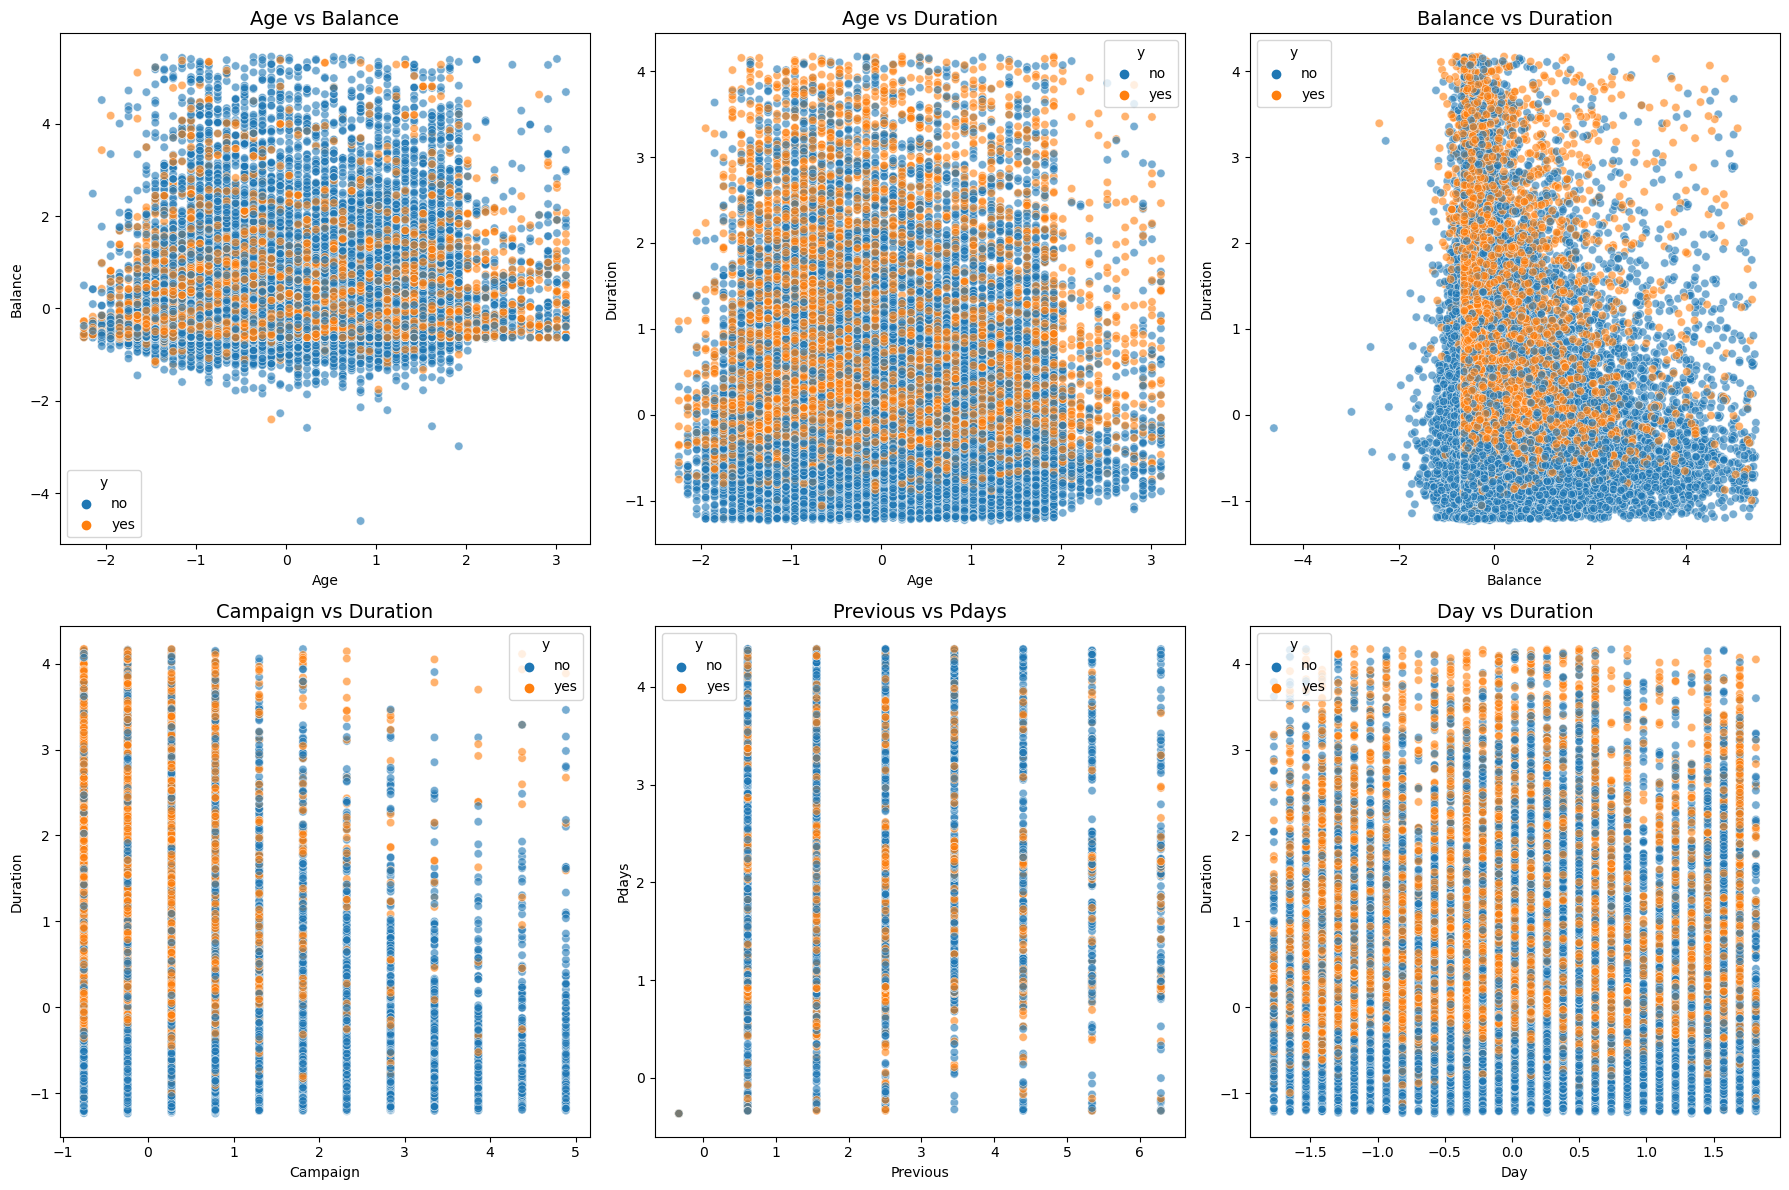

Scatter plots showing relationships between numeric variables.
Points are colored by subscription outcome (y): 'yes' vs 'no'


In [ ]:
# Create scatter plots to explore relationships between numeric variables
integer_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create scatter plots for interesting relationships
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Define interesting relationships to plot
relationships = [
    ('age', 'balance'),
    ('age', 'duration'),
    ('balance', 'duration'),
    ('campaign', 'duration'),
    ('previous', 'pdays'),
    ('day', 'duration')
]

for i, (x_col, y_col) in enumerate(relationships):
    if i < len(axes):
        # Color by target variable 'y' if you want to see subscription patterns
        sns.scatterplot(data=df_bank, x=x_col, y=y_col, hue='y', ax=axes[i], alpha=0.6)
        axes[i].set_title(f'{x_col.title()} vs {y_col.title()}', fontsize=14)
        axes[i].set_xlabel(x_col.title())
        axes[i].set_ylabel(y_col.title())

plt.tight_layout()
plt.show()

print("Scatter plots showing relationships between numeric variables.")
print("Points are colored by subscription outcome (y): 'yes' vs 'no'")

In [ ]:
replacements = {'yes': '1', 'no': '0'}
df_bank['y'] = df_bank['y'].replace(replacements)
df['y'] = df_bank['y'].astype(int)

Creating correlation matrix for original features (before one-hot encoding)...
Converting categorical columns to numeric codes: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


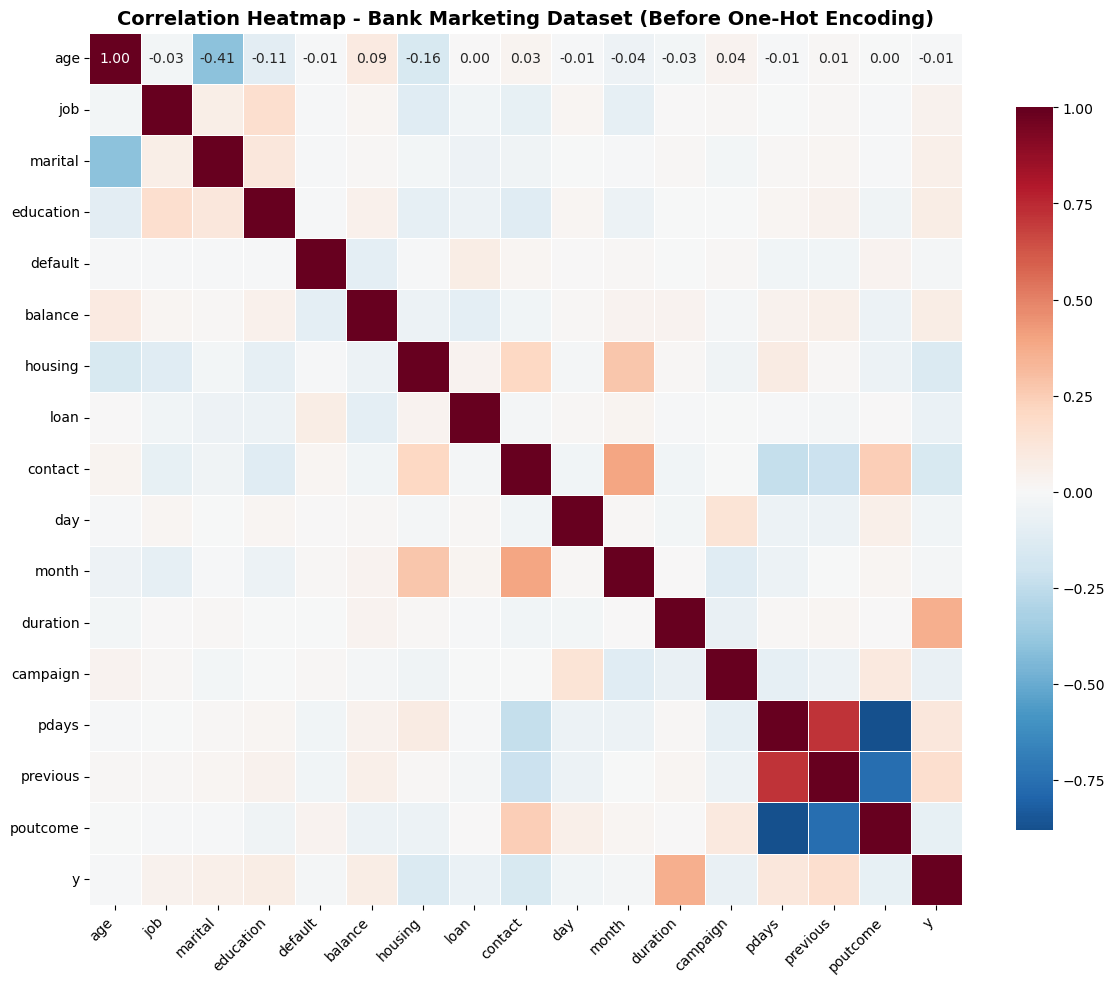

  y: 1.000
  duration: 0.362
  previous: 0.168
  contact: 0.156
  housing: 0.144
  pdays: 0.114
  poutcome: 0.087
  campaign: 0.078
  education: 0.075
  loan: 0.070
  balance: 0.067
  marital: 0.054
  job: 0.040
  day: 0.030
  month: 0.020
  default: 0.018
  age: 0.009

Strongest feature-to-feature correlations (absolute value > 0.3):
  pdays <-> poutcome: 0.881
  previous <-> poutcome: 0.760
  pdays <-> previous: 0.720
  age <-> marital: 0.408
  contact <-> month: 0.391


In [ ]:
# Correlation heatmap for bank marketing dataset (BEFORE one-hot encoding)
print("Creating correlation matrix for original features (before one-hot encoding)...")

# Create a copy for correlation analysis
df_bank_corr = df_bank.copy()

# Convert categorical columns to numeric codes for correlation analysis
categorical_cols_for_corr = df_bank_corr.select_dtypes(include=['object']).columns
print(f"Converting categorical columns to numeric codes: {list(categorical_cols_for_corr)}")

for col in categorical_cols_for_corr:
    df_bank_corr[col] = pd.Categorical(df_bank_corr[col]).codes

# Create correlation matrix
correlation_matrix_pre_encoding = df_bank_corr.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_pre_encoding, 
            annot=True,  # Show correlation values
            cmap='RdBu_r', 
            center=0,
            square=True,
            linewidths=0.5,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap - Bank Marketing Dataset (Before One-Hot Encoding)', 
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Show correlations with target variable
target_corr_pre = correlation_matrix_pre_encoding['y'].abs().sort_values(ascending=False)
# print("\nCorrelations with target variable 'y' (absolute values, sorted):")
for feature, corr in target_corr_pre.items():
    print(f"  {feature}: {corr:.3f}")

# Show strong correlations between features (excluding target)
print("\nStrongest feature-to-feature correlations (absolute value > 0.3):")
strong_corr_pairs = []
for i in range(len(correlation_matrix_pre_encoding.columns)):
    for j in range(i+1, len(correlation_matrix_pre_encoding.columns)):
        if correlation_matrix_pre_encoding.columns[i] != 'y' and correlation_matrix_pre_encoding.columns[j] != 'y':
            corr_val = abs(correlation_matrix_pre_encoding.iloc[i, j])
            if corr_val > 0.3:
                strong_corr_pairs.append((
                    correlation_matrix_pre_encoding.columns[i], 
                    correlation_matrix_pre_encoding.columns[j], 
                    corr_val
                ))

for feat1, feat2, corr_val in sorted(strong_corr_pairs, key=lambda x: x[2], reverse=True):
    print(f"  {feat1} <-> {feat2}: {corr_val:.3f}")

In [ ]:
# Get categorical columns (excluding target variable)
categorical_columns = df_bank.select_dtypes(include=['object']).columns.tolist()
if 'y' in categorical_columns:
    categorical_columns.remove('y')  # Exclude target variable

print(f"Categorical columns to encode: {categorical_columns}")
print(f"Original dataset shape: {df_bank.shape}")

# Apply one-hot encoding with float dtype
df_bank_encoded = pd.get_dummies(df_bank, columns=categorical_columns, drop_first=True, dtype=float)

print(f"After one-hot encoding shape: {df_bank_encoded.shape}")
print(f"Total features created: {df_bank_encoded.shape[1] - 1}")  # -1 for target variable

# Ensure all numeric columns are float
numeric_columns = df_bank_encoded.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_columns:
    if col != 'y':  # Don't convert target variable
        df_bank_encoded[col] = df_bank_encoded[col].astype(float)

print(f"All feature dtypes converted to float: {df_bank_encoded.select_dtypes(include=[float]).shape[1] - 1}")

df_bank_encoded.head()

Categorical columns to encode: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Original dataset shape: (40209, 17)
After one-hot encoding shape: (40209, 43)
Total features created: 42
All feature dtypes converted to float: 41


age   balance       day  duration  campaign     pdays  previous  y  \
0  1.719131  0.614998 -1.293667  0.132375   -0.7504 -0.364873 -0.333651  0   
1  0.331158 -0.612057 -1.293667 -0.445331   -0.7504 -0.364873 -0.333651  0   
2 -0.759393 -0.627729 -1.293667 -0.839221   -0.7504 -0.364873 -0.333651  0   
3  0.628581  0.245257 -1.293667 -0.755191   -0.7504 -0.364873 -0.333651  0   
4 -0.759393 -0.628309 -1.293667 -0.198493   -0.7504 -0.364873 -0.333651  0   

   job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
0              0.0               0.0  ...        0.0        0.0        0.0   
1              0.0               0.0  ...        0.0        0.0        0.0   
2              0.0               1.0  ...        0.0        0.0        0.0   
3              1.0               0.0  ...        0.0        0.0        0.0   
4              0.0               0.0  ...        0.0        0.0        0.0   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0        1.0        0.0        0.0        0.0             0.0   
1        1.0        0.0        0.0        0.0             0.0   
2        1.0        0.0        0.0        0.0             0.0   
3        1.0        0.0        0.0        0.0             0.0   
4        1.0        0.0        0.0        0.0             0.0   

   poutcome_success  poutcome_unknown  
0               0.0               1.0  
1               0.0               1.0  
2               0.0               1.0  
3               0.0               1.0  
4               0.0               1.0  

[5 rows x 43 columns]

In [ ]:
# Now apply PCA AFTER one-hot encoding
print("=== DIMENSIONALITY REDUCTION USING PCA (After One-Hot Encoding) ===")

# Use the one-hot encoded dataframe
df_bank = df_bank_encoded.copy()

# Prepare features for PCA (all features except target variable)
feature_columns = [col for col in df_bank.columns if col != 'y']
X_for_pca = df_bank[feature_columns].values.astype(float)

print(f"Features for PCA shape: {X_for_pca.shape}")
print(f"Feature columns: {len(feature_columns)} total features")
print(f"Sample feature names: {feature_columns[:10]}...")  # Show first 10 feature names

# Apply PCA to reduce dimensionality from all features to manageable number
n_components = 10  # Increase since we have many more features now
pca_bank_preprocessing = PCA(n_components=n_components)
X_pca_reduced = pca_bank_preprocessing.fit_transform(X_for_pca)

# Add PCA components back to dataframe
pca_columns = [f'PC{i+1}' for i in range(n_components)]
for i, col in enumerate(pca_columns):
    df_bank[col] = X_pca_reduced[:, i]

print(f"PCA components shape: {X_pca_reduced.shape}")
print(f"PCA explained variance ratio: {pca_bank_preprocessing.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca_bank_preprocessing.explained_variance_ratio_):.3f}")

# Show top contributing features for first few components
print(f"\nPCA Component Analysis (Top Contributors):")
for i in range(min(4, n_components)):  # Show first 4 components
    print(f"\nPC{i+1} (explains {pca_bank_preprocessing.explained_variance_ratio_[i]:.1%} variance):")
    # Get feature contributions to this component
    component_contributions = pca_bank_preprocessing.components_[i]
    
    # Get top 5 positive and negative contributors
    feature_contrib_pairs = [(feature_columns[j], contrib) for j, contrib in enumerate(component_contributions)]
    feature_contrib_pairs.sort(key=lambda x: abs(x[1]), reverse=True)
    
    print("  Top contributors:")
    for feat_name, contrib in feature_contrib_pairs[:5]:
        print(f"    {feat_name}: {contrib:.3f}")

df_bank.head()

=== DIMENSIONALITY REDUCTION USING PCA (After One-Hot Encoding) ===
Features for PCA shape: (40209, 42)
Feature columns: 42 total features
Sample feature names: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid']...
PCA components shape: (40209, 10)
PCA explained variance ratio: [0.18365474 0.11595046 0.1094424  0.09805489 0.08958113 0.08313892
 0.04976928 0.03647021 0.03022985 0.02752801]
Total variance explained: 0.824

PCA Component Analysis (Top Contributors):

PC1 (explains 18.4% variance):
  Top contributors:
    pdays: 0.667
    previous: 0.660
    poutcome_unknown: -0.235
    campaign: -0.150
    day: -0.115

PC2 (explains 11.6% variance):
  Top contributors:
    age: 0.662
    campaign: 0.431
    balance: 0.360
    day: 0.304
    duration: -0.254

PC3 (explains 10.9% variance):
  Top contributors:
    day: -0.511
    campaign: -0.478
    age: 0.441
    balance: 0.375
    duration: 0.336

PC4 (explains 9

age   balance       day  duration  campaign     pdays  previous  y  \
0  1.719131  0.614998 -1.293667  0.132375   -0.7504 -0.364873 -0.333651  0   
1  0.331158 -0.612057 -1.293667 -0.445331   -0.7504 -0.364873 -0.333651  0   
2 -0.759393 -0.627729 -1.293667 -0.839221   -0.7504 -0.364873 -0.333651  0   
3  0.628581  0.245257 -1.293667 -0.755191   -0.7504 -0.364873 -0.333651  0   
4 -0.759393 -0.628309 -1.293667 -0.198493   -0.7504 -0.364873 -0.333651  0   

   job_blue-collar  job_entrepreneur  ...       PC1       PC2       PC3  \
0              0.0               0.0  ... -0.229063  0.585396  2.198886   
1              0.0               0.0  ... -0.374798 -1.044997  0.731287   
2              0.0               1.0  ... -0.414014 -1.350872  0.304396   
3              1.0               0.0  ... -0.336819 -0.087239  1.322705   
4              0.0               0.0  ... -0.375345 -1.659971  0.425139   

        PC4       PC5       PC6       PC7       PC8       PC9      PC10  
0 -0.711083 -0.013230 -0.006081 -0.308369  1.520310  0.346244 -0.024437  
1 -1.286724  0.118505 -0.053149  0.601636  0.026373  1.284869 -0.097212  
2 -1.466502  0.486850 -0.037107  0.900301  0.434067 -0.358960  0.262250  
3 -1.295879  0.530050 -0.102888  0.737994  1.020359  0.000866  0.118786  
4 -0.871360  0.383640  0.244770 -0.206172  0.225008  0.877667  0.079968  

[5 rows x 53 columns]

In [ ]:
# Run K-means and DBSCAN clustering on bank dataset using PCA components
print("=== CLUSTERING ANALYSIS ON BANK DATASET (PCA Components) ===")

# Use PCA components for clustering (similar to circles dataset approach)
X_bank = df_bank[pca_columns].values.astype(np.float64)

# Ensure target variable is integer
df_bank['y'] = pd.to_numeric(df_bank['y'], errors='coerce').astype(int)
y_true_bank = df_bank['y'].values

print(f"Bank dataset shape for clustering (PCA): {X_bank.shape}")
print(f"Using PCA components: {pca_columns}")
print(f"Target variable dtype: {y_true_bank.dtype}")
print(f"Target distribution: {np.bincount(y_true_bank)}")

# Apply K-means clustering (use fewer clusters since we have 2 true classes)
k_clusters = 5 
kmeans_bank = KMeans(k=k_clusters, max_iter=100)
kmeans_bank.fit(X_bank)

# Get K-means labels
distances_bank = np.linalg.norm(X_bank[:, np.newaxis] - kmeans_bank.centroids, axis=2)
labels_kmeans_bank = np.argmin(distances_bank, axis=1)

# Apply DBSCAN clustering
db_bank = DBSCAN(eps=0.5, min_samples=50)  # Adjusted parameters for bank data
labels_dbscan_bank = db_bank.fit_predict(X_bank)

# Calculate metrics
n_noise_bank = int((labels_dbscan_bank == -1).sum())
unique_labels_bank = set(labels_dbscan_bank)
n_clusters_db_bank = len(unique_labels_bank - {-1})

print(f"\nClustering Results:")
print(f"K-means: {len(set(labels_kmeans_bank))} clusters")
print(f"DBSCAN: {n_clusters_db_bank} clusters and {n_noise_bank} noise points")

# Compute silhouette scores
S_kmeans_bank = silhouette_score(X_bank, labels_kmeans_bank)
print(f"K-means Silhouette Score: {S_kmeans_bank:.6f}")

# DBSCAN silhouette score (excluding noise points)
mask_bank = labels_dbscan_bank != -1
if n_clusters_db_bank >= 2 and mask_bank.sum() > 0:
    S_dbscan_bank = silhouette_score(X_bank[mask_bank], labels_dbscan_bank[mask_bank])
    print(f"DBSCAN Silhouette Score (excluding noise): {S_dbscan_bank:.6f}")
else:
    print("DBSCAN: Cannot compute silhouette score (need at least 2 clusters excluding noise)")

# Calculate NMI with true labels
from sklearn.metrics import normalized_mutual_info_score

nmi_kmeans_bank = normalized_mutual_info_score(y_true_bank, labels_kmeans_bank)
nmi_dbscan_bank = normalized_mutual_info_score(y_true_bank, labels_dbscan_bank)

print(f"\nNormalized Mutual Information with true labels:")
print(f"K-means NMI: {nmi_kmeans_bank:.6f}")
print(f"DBSCAN NMI: {nmi_dbscan_bank:.6f}")

=== CLUSTERING ANALYSIS ON BANK DATASET (PCA Components) ===
Bank dataset shape for clustering (PCA): (40209, 10)
Using PCA components: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
Target variable dtype: int64
Target distribution: [36155  4054]


Clustering Progress:  39%|███▉      | 39/100 [00:00<00:00, 137.24it/s]



Clustering Results:
K-means: 5 clusters
DBSCAN: 0 clusters and 40209 noise points
K-means Silhouette Score: 0.144677
DBSCAN: Cannot compute silhouette score (need at least 2 clusters excluding noise)

Normalized Mutual Information with true labels:
K-means NMI: 0.019360
DBSCAN NMI: 0.000000


PCA preprocessing variance explained: 0.824


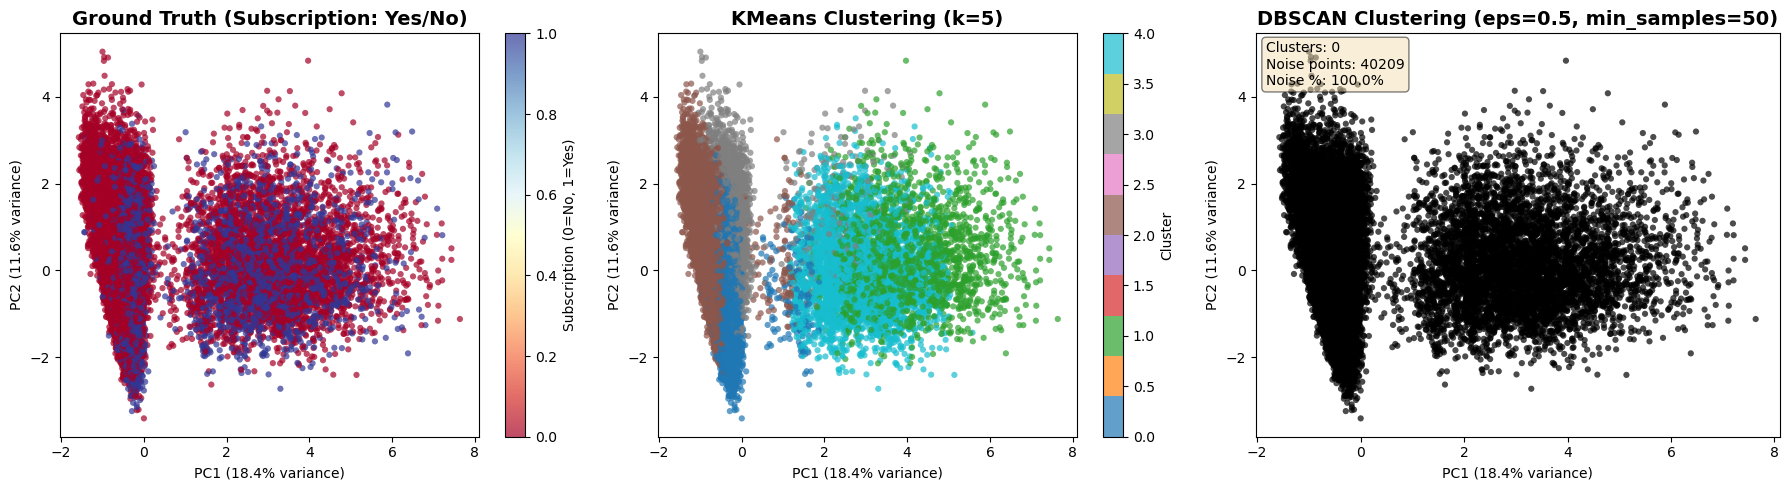


Bank Dataset Clustering Summary:
  Ground Truth: 2 classes (subscription: yes/no)
  K-means: 5 clusters
  DBSCAN: 0 clusters + 40209 noise points (100.0%)
  PCA preprocessing variance captured: 82.4%


In [ ]:
# Visualize bank dataset clustering results (similar to circles dataset format)
print(f"PCA preprocessing variance explained: {sum(pca_bank_preprocessing.explained_variance_ratio_):.3f}")

# Create visualization similar to circles dataset using first 2 PCA components
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original data with true labels (subscription: yes/no)
ax1 = axes[0]
scatter1 = ax1.scatter(df_bank['PC1'], df_bank['PC2'], c=y_true_bank, 
                      cmap='RdYlBu', s=20, alpha=0.7, edgecolors='none')
ax1.set_title('Ground Truth (Subscription: Yes/No)', fontsize=14, fontweight='bold')
ax1.set_xlabel(f'PC1 ({pca_bank_preprocessing.explained_variance_ratio_[0]:.1%} variance)')
ax1.set_ylabel(f'PC2 ({pca_bank_preprocessing.explained_variance_ratio_[1]:.1%} variance)')
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Subscription (0=No, 1=Yes)')

# KMeans clustering results
ax2 = axes[1]
scatter2 = ax2.scatter(df_bank['PC1'], df_bank['PC2'], c=labels_kmeans_bank, 
                      cmap='tab10', s=20, alpha=0.7, edgecolors='none')
ax2.set_title(f'KMeans Clustering (k={k_clusters})', fontsize=14, fontweight='bold')
ax2.set_xlabel(f'PC1 ({pca_bank_preprocessing.explained_variance_ratio_[0]:.1%} variance)')
ax2.set_ylabel(f'PC2 ({pca_bank_preprocessing.explained_variance_ratio_[1]:.1%} variance)')
plt.colorbar(scatter2, ax=ax2, label='Cluster')

# DBSCAN clustering results
ax3 = axes[2]
# Create color map - noise points in black
unique_labels_db_bank = set(labels_dbscan_bank)
colors_db_bank = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_db_bank))]

for k, col in zip(unique_labels_db_bank, colors_db_bank):
    if k == -1:
        # Black for noise
        col = [0, 0, 0, 1]
    
    class_member_mask = (labels_dbscan_bank == k)
    xy_pca = df_bank[['PC1', 'PC2']].values[class_member_mask]
    ax3.scatter(xy_pca[:, 0], xy_pca[:, 1], c=[col], s=20, alpha=0.7, edgecolors='none', 
                label='Noise' if k == -1 else f'Cluster {k}')

ax3.set_title(f'DBSCAN Clustering (eps={db_bank.eps}, min_samples={db_bank.min_samples})', 
              fontsize=14, fontweight='bold')
ax3.set_xlabel(f'PC1 ({pca_bank_preprocessing.explained_variance_ratio_[0]:.1%} variance)')
ax3.set_ylabel(f'PC2 ({pca_bank_preprocessing.explained_variance_ratio_[1]:.1%} variance)')

# Add summary text
textstr = f'Clusters: {n_clusters_db_bank}\nNoise points: {n_noise_bank}\nNoise %: {n_noise_bank/len(X_bank)*100:.1f}%'
ax3.text(0.02, 0.98, textstr, transform=ax3.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\nBank Dataset Clustering Summary:")
print(f"  Ground Truth: 2 classes (subscription: yes/no)")
print(f"  K-means: {len(set(labels_kmeans_bank))} clusters")
print(f"  DBSCAN: {n_clusters_db_bank} clusters + {n_noise_bank} noise points ({n_noise_bank/len(X_bank)*100:.1f}%)")
print(f"  PCA preprocessing variance captured: {sum(pca_bank_preprocessing.explained_variance_ratio_):.1%}")